In [27]:
### Importing required libraries ###

In [2]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Rescaling
from glob import glob
import pathlib
import matplotlib.pyplot as plt
import os
import PIL



2025-01-15 16:55:45.121721: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-15 16:55:45.310020: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736940345.386612    6969 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736940345.426460    6969 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 16:55:45.648175: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

 ### Reading and understanding data & dataset creation ###

In [18]:
data_dir_train = pathlib.Path(r"/home/anmaitre/Downloads/CNN_assignment/Train")
data_dir_test = pathlib.Path(r"/home/anmaitre/Downloads/CNN_assignment/Test/")

In [19]:
#print image counts
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [20]:

batch_size = 32
img_height = 180
img_width = 180

In [21]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [23]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


### Dataset Visualization ###

In [24]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


2025-01-15 17:29:37.948992: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


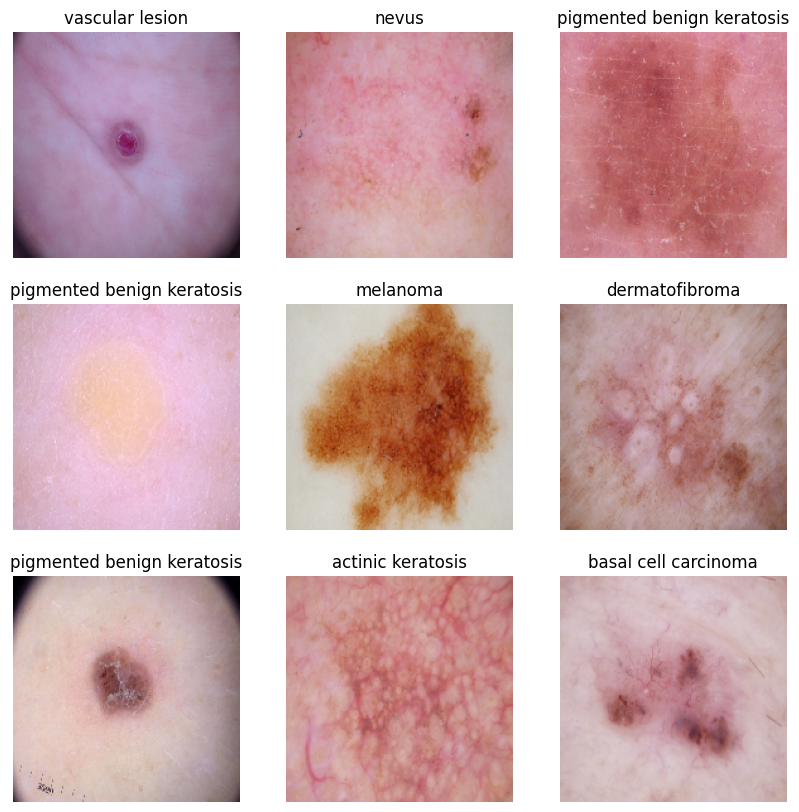

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Build & Train Model

### Build & Train Model

In [29]:

model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [30]:
### Todo, choose an appropirate optimiser and loss function
optimizer = 'adam'
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.1995 - loss: 7.2013 - val_accuracy: 0.1924 - val_loss: 2.0454
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2438 - loss: 2.0014 - val_accuracy: 0.2707 - val_loss: 1.8971
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3488 - loss: 1.7793 - val_accuracy: 0.3557 - val_loss: 1.8339
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.4368 - loss: 1.6387 - val_accuracy: 0.5011 - val_loss: 1.4876
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5451 - loss: 1.2907 - val_accuracy: 0.4564 - val_loss: 1.5241
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5625 - loss: 1.2118 - val_accuracy: 0.4877 - val_loss: 1.5699
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6285 - loss: 1.0594 - val_accuracy: 0.5615 - val_loss: 1.5085
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6818 - loss: 0.9424 - val_accuracy: 0.4362 -

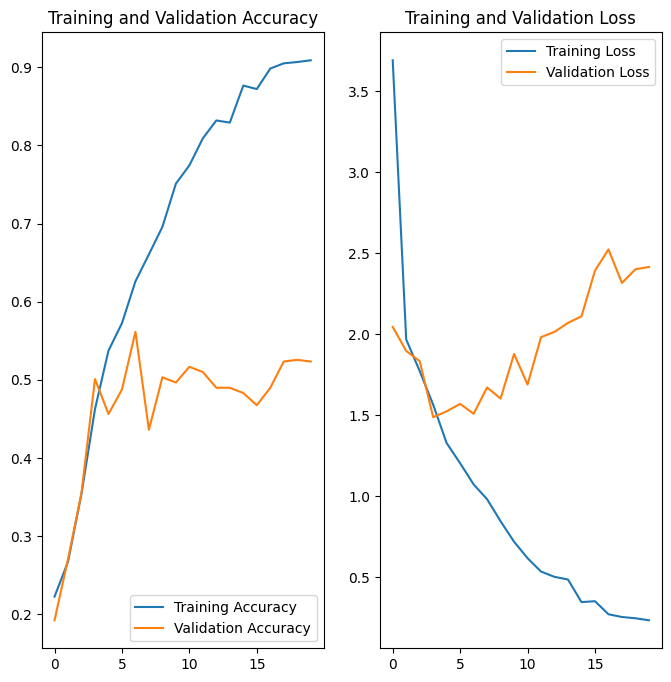

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9347 - loss: 0.1807
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5682 - loss: 2.2015
Accuracy:  0.9313616156578064
Validation Accuracy:  0.5234899520874023
Loss:  0.17809009552001953
Validation Loss 2.4155633449554443


#### As it can be seen from above results that there is a huge difference in train and validation accuracy, above model is clearly an overfitting model. 
#### We will use data augmentation to improve the above model. ####

In [36]:
data_augm= tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Retrain model on augmented data ###

In [38]:
# we will also use drop outs to improve accuracy

# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augm)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [39]:
#compile model
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [40]:
#summary of model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


E0000 00:00:1736944208.035281    6969 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_5_1/dropout_1_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.1766 - loss: 5.5796 - val_accuracy: 0.3244 - val_loss: 1.9252
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.2893 - loss: 1.9066 - val_accuracy: 0.2438 - val_loss: 1.8673
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.3105 - loss: 1.8408 - val_accuracy: 0.4027 - val_loss: 1.7313
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.3672 - loss: 1.6991 - val_accuracy: 0.4899 - val_loss: 1.5499
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.4377 - loss: 1.5573 - val_accuracy: 0.5034 - val_loss: 1.5105
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.4877 - loss: 1.4413 - val_accuracy: 0.5078 - val_loss: 1.4723
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.5059 - loss: 1.4285 - val_accuracy: 0.5213 - val_loss: 1.4278
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.4996 - loss: 1.3745 - val_accuracy: 0.4631 - val_loss: 1.

#### We can see form above that model accuracy has increased and difference of train and validation accuracy has decreased. ####
#### Now we will try class balancing on above model. ####

### Handle class imbalance ###

In [42]:
# Print class distribution
for class_index in range(len(class_names)):
  print(class_names[class_index],' - ',len(list(data_dir_train.glob(class_names[class_index]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


In [43]:
# Define the path to the training dataset
path_to_training_dataset = "/home/anmaitre/Downloads/CNN_assignment/Train/"

# Import the Augmentor library
import Augmentor

# Loop through each class and perform data augmentation
for class_index in class_names:
    # Create an Augmentor pipeline for the current class
    p = Augmentor.Pipeline(path_to_training_dataset + class_index)

    # Apply rotation augmentation with specified parameters
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Generate and save 500 augmented samples for each class
    p.sample(500)  # Adding 500 samples per class to ensure class balance

Initialised with 114 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8CB82AA6B0>: 100%


Initialised with 376 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8D80376DA0>: 100%


Initialised with 95 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8CC8C73EB0>: 100%


Initialised with 438 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C8CC2115630>: 100


Initialised with 357 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7C8CB82CE110>: 100%


Initialised with 462 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8CC0037670>: 100%


Initialised with 77 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 181 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8CB82ABFA0>: 100%


Initialised with 139 image(s) found.
Output directory set to /home/anmaitre/Downloads/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C8CC21159F0>: 100%


In [44]:
# Count the number of image files in the 'output' subdirectories of each class
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))

# Print total count of augmented images
print("Total count of augmented images:", image_count_train)

Total count of augmented images: 4500


Post Data Augmentation

In [45]:
path_list_new = list(glob(os.path.join(data_dir_train, '*','output', '*.jpg')))

In [46]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [47]:


dict_new = dict(zip(path_list_new, lesion_list_new))
df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])



In [48]:
df['Label'].value_counts()


Label
nevus                         500
vascular lesion               500
actinic keratosis             500
melanoma                      500
seborrheic keratosis          500
squamous cell carcinoma       500
basal cell carcinoma          500
dermatofibroma                500
pigmented benign keratosis    500
Name: count, dtype: int64

### Retrain model on balanced classes ###

In [52]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [53]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [55]:

model=models.Sequential()
# scaler
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augm)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [56]:
#compile the model
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [57]:
#summarize
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# retrain
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
  1/169 ━━━━━━━━━━━━━━━━━━━━ 2:24 861ms/step - accuracy: 0.0625 - loss: 2.1904

E0000 00:00:1736948515.474937    6969 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_7_1/dropout_2_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


169/169 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.2192 - loss: 3.9965 - val_accuracy: 0.4083 - val_loss: 1.5176
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.4358 - loss: 1.4952 - val_accuracy: 0.4670 - val_loss: 1.4507
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.4566 - loss: 1.4534 - val_accuracy: 0.4766 - val_loss: 1.3337
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.4922 - loss: 1.3282 - val_accuracy: 0.5130 - val_loss: 1.3196
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5119 - loss: 1.2786 - val_accuracy: 0.5360 - val_loss: 1.2171
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5358 - loss: 1.2109 - val_accuracy: 0.5575 - val_loss: 1.1720
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5477 - loss: 1.1686 - val_accuracy: 0.5709 - val_loss: 1.1396
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5692 - loss: 1.1378 - val_accurac

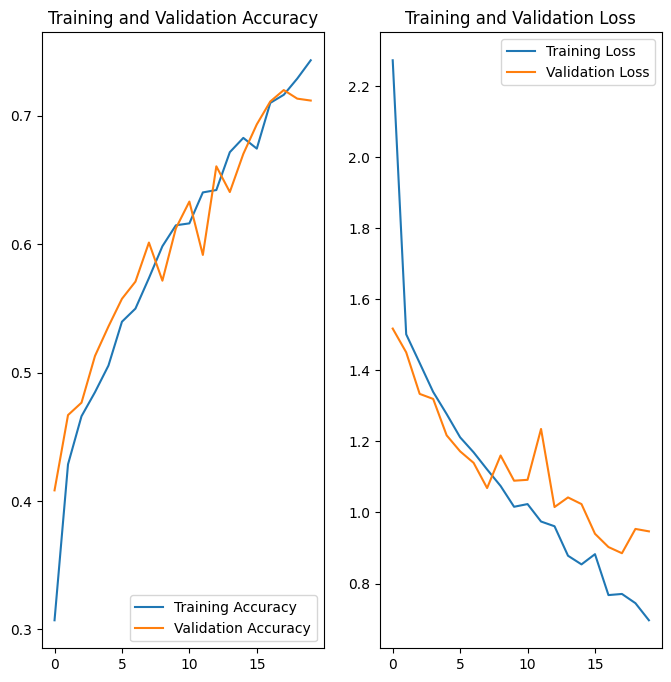

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7693 - loss: 0.6299
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7092 - loss: 0.9554
Accuracy:  0.778931736946106
Validation Accuracy:  0.7119525074958801
Loss:  0.6064985394477844
Validation Loss 0.946832537651062


### Conclusion ###

After data augmentation and class balancing, accuracy has increased from 52% to 71%.
Model accuracy is moderalte.

### Predicting on test data ###

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Actual Class name: pigmented benign keratosis
Predicted Class: pigmented benign keratosis


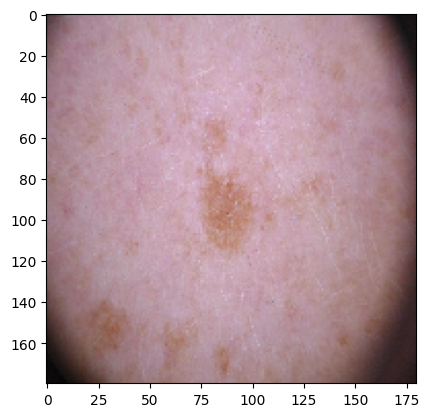

In [72]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
test_img_path = os.path.join(data_dir_test, class_names[5], '*')
test_img = glob(test_img_path)
test_img = load_img(test_img[-1],target_size=(180,180,3))
plt.imshow(test_img)
plt.grid(False)

img = np.expand_dims(test_img,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class name: {class_names[5]}" + '\n' + "Predicted Class: " + pred_class)